# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

load_dotenv()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/christiancampbell/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key savefig.frameon in file /Users/christiancampbell/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/christiancampbell/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in 

In [3]:
# Read your api key environment variable
api_key = os.getenv("NEWSAPI_KEY")

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="bitcoin", language="en", page_size=100, sort_by="relevancy")

print(f"Total articles about Bitcoin {btc_news['totalResults']}")

btc_news["articles"][0]

TypeError: expected string or bytes-like object

In [169]:
# Fetch the Ethereum news articles
etc_news = newsapi.get_everything(q="ethereum", language="en", page_size=100, sort_by="relevancy")

print(f"Total articles about Ethereum {etc_news['totalResults']}")

etc_news["articles"][0]

Total articles about Ethereum 1306


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Karissa Bell',
 'title': 'PayPal now lets all US users buy, sell and hold cryptocurrency',
 'description': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only available to a small subset of PayPal account holders. That’s…',
 'url': 'https://www.engadget.com/paypal-opens-cryptocurrency-all-us-accounts-210541778.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-11%2F4e1af080-2528-11eb-bbdf-193e571d142a&client=amp-blogside-v2&signature=22ad23dde6ee3e667a8067a4c39e1962659cec92',
 'publishedAt': '2020-11-12T21:05:41Z',
 'content': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptoc

In [170]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })

    except AttributeError:
        pass

btc_df = pd.DataFrame(btc_sentiments)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000


In [171]:
# Create the ethereum sentiment scores DataFrame
etc_sentiments = []

for article in etc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        etc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })

    except AttributeError:
        pass

etc_df = pd.DataFrame(etc_sentiments)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
etc_df = etc_df[cols]

etc_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948


In [172]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,98.000000,98.000000,98.000000,98.000000
mean,0.151223,0.056990,0.020847,0.922173
std,0.338619,0.065976,0.053264,0.083086
min,-0.946800,0.000000,0.000000,0.637000
25%,0.000000,0.000000,0.000000,0.858000
50%,0.000000,0.050000,0.000000,0.948000
75%,0.416600,0.120000,0.000000,1.000000
max,0.877900,0.318000,0.363000,1.000000


In [173]:
# Describe the Ethereum Sentiment
etc_df.describe()

,compound,positive,negative,neutral
count,97.000000,97.000000,97.000000,97.000000
mean,0.237426,0.078505,0.020165,0.901340
std,0.359391,0.079579,0.043562,0.089348
min,-0.670500,0.000000,0.000000,0.653000
25%,0.000000,0.000000,0.000000,0.847000
50%,0.226300,0.074000,0.000000,0.912000
75%,0.510600,0.132000,0.000000,1.000000
max,0.883400,0.347000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [174]:
#Q1 Answer: Ethereum
#Q2 Answer: Ethereum
#Q3 Answer: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [175]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [176]:
# Expand the default stopwords list if necessary
import nltk
nltk.download('wordnet')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')


lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/christiancampbell/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     /Users/christiancampbell/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christiancampbell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/christiancampbell/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [177]:
# Complete the tokenizer function
def tokenizer(text):
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    sw = set(stopwords.words('english'))
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens


In [178]:
# Create a new tokens column for bitcoin
btc_df["tokens"] = btc_df['text'].apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737,"[former, microsoft, software, engineer, ukrain..."
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[visahas, partnered, cryptocurrency, startup, ..."
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947,"[paypal, bringing, newlyannounced, support, cr..."
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[november, absolutely, massive, twomonth, rall..."
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000,"[unlike, conventional, cryptocurrencies, centr..."


In [179]:
# Create a new tokens column for ethereum
etc_df["tokens"] = etc_df['text'].apply(tokenizer)
etc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947,"[paypal, bringing, newlyannounced, support, cr..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[london, reuters, digital, currency, ethereum,..."
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948,"[new, york, reuters, institutional, investor, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [180]:
from collections import Counter
from nltk import ngrams

In [181]:
# Generate the Bitcoin N-grams where N=2
big_string = ' '.join(btc_df['text'])
processed = tokenizer(big_string)
bigram_counts = ngrams(processed, n=2)
Counter(bigram_counts).most_common(10)

[(('virtual', 'currency'), 31),
 (('reuters', 'bitcoin'), 26),
 (('currency', 'bitcoin'), 23),
 (('illustration', 'taken'), 23),
 (('char', 'reuters'), 21),
 (('bitcoin', 'seen'), 19),
 (('reuters', 'stafffile'), 13),
 (('stafffile', 'photo'), 13),
 (('representation', 'virtual'), 13),
 (('taken', 'november'), 12)]

In [182]:
# Generate the Ethereum N-grams where N=2
big_string = ' '.join(etc_df['text'])
processed = tokenizer(big_string)
bigram_counts = ngrams(processed, n=2)
Counter(bigram_counts).most_common(10)

[(('virtual', 'currency'), 10),
 (('char', 'ethereum'), 8),
 (('char', 'bitcoin'), 8),
 (('york', 'reuters'), 7),
 (('currency', 'bitcoin'), 7),
 (('illustration', 'taken'), 7),
 (('reuters', 'bitcoin'), 7),
 (('photo', 'representation'), 6),
 (('char', 'new'), 6),
 (('char', 'reuters'), 6)]

In [183]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    return Counter(tokens).most_common(N)

In [184]:
# Get the top 10 words for Bitcoin
big_string = ' '.join(btc_df['text'])
processed = tokenizer(big_string)
token_count(processed)

[('char', 97),
 ('bitcoin', 82),
 ('reuters', 70),
 ('currency', 39),
 ('virtual', 33),
 ('photo', 31),
 ('taken', 31),
 ('illustration', 27),
 ('reutersdado', 27),
 ('seen', 26)]

In [185]:
# Get the top 10 words for Ethereum
big_string = ' '.join(etc_df['text'])
processed = tokenizer(big_string)
token_count(processed)

[('char', 97),
 ('ethereum', 52),
 ('bitcoin', 40),
 ('ha', 24),
 ('reuters', 21),
 ('cryptocurrency', 18),
 ('blockchain', 18),
 ('currency', 13),
 ('asset', 13),
 ('price', 13)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [186]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [187]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw_words = [word.lower() for word in lem if word.lower() not in sw]
    bigrams = ngrams(sw_words, 2)
    output = ['_'.join(i) for i in bigrams]
    return ' '.join(output)

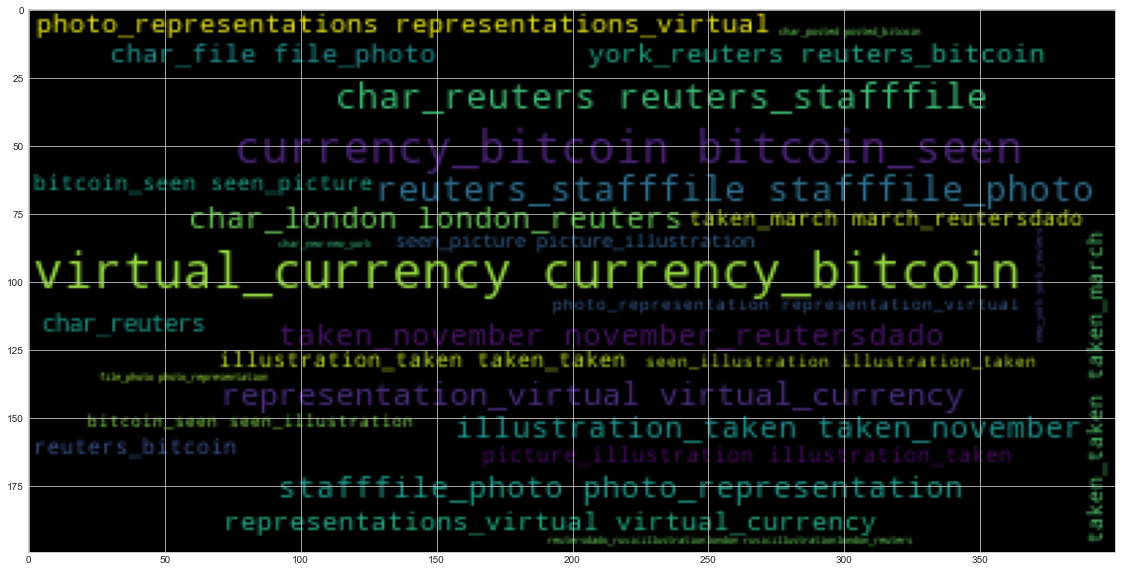

In [188]:
# Generate the Bitcoin word cloud
big_string = ' '.join(btc_df['text'])
input_text = process_text(big_string)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

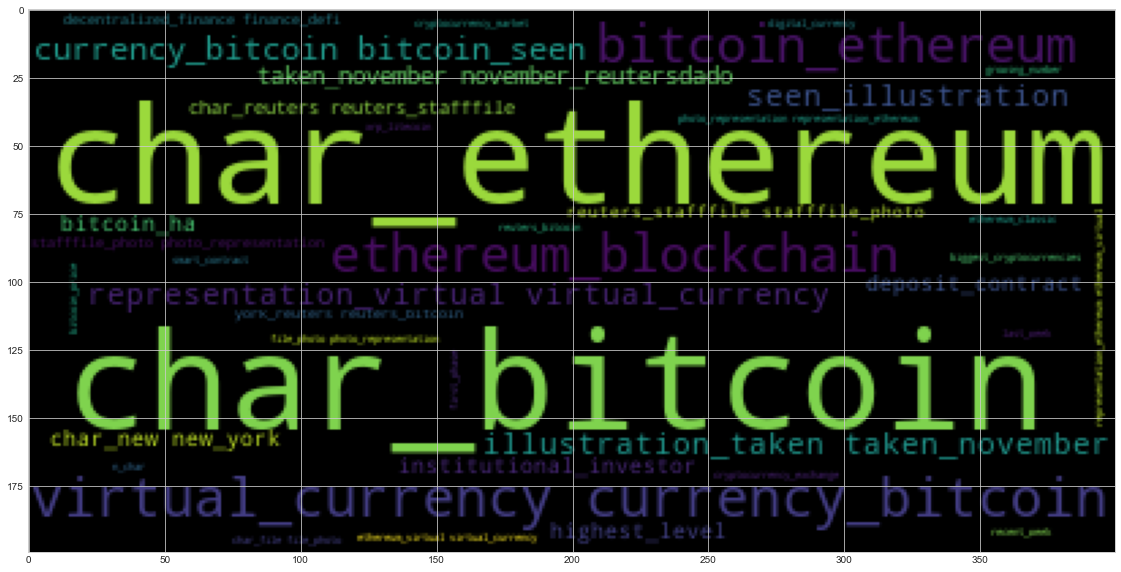

In [189]:
# Generate the Ethereum word cloud
big_string = ' '.join(etc_df['text'])
input_text = process_text(big_string)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [6]:
import spacy
from nltk.corpus import reuters
from spacy import displacy

In [204]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [7]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

'Cryptocurrency exchange Binance has resumed trading activity. Users can now cancel open orders, deposit crypto assets into their Binance account, and of course buy and sell cryptocurrencies. You cant withdraw crypto assets to an external wallet just yet, but … [+1191 chars]Bitcoin is now trading at around $8,130, up a whopping 60.84 percent over the past month, with the price surging $3,086.14 over the period.\r\nThe cryptocurrency’s meteoric rise is reminiscent of its rocketing growth in the latter half of 2017, when prices reac… [+4311 chars]Binance has vowed to raise the quality of its security in the aftermath of a hack that saw thieves make off with over $40 million in Bitcoin from the exchange.\r\nThe company — which is widely believed to operate the world’s largest crypto exchange based on tra… [+2269 chars]A new payment network called Flexa is launching today that’ll let you spend cryptocurrencies in physical stores. The technology currently supports bitcoin, ether, bitcoin ca

In [31]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [32]:
# Render the visualization
# YOUR CODE HERE!

In [33]:
# List all Entities
# YOUR CODE HERE!

Binance PERSON
Binance GPE
around $8,130 MONEY
60.84 percent PERCENT
the past month DATE
3,086.14 MONEY
the latter half of 2017 DATE
$40 million MONEY
Bitcoin GPE
Flexa ORG
today DATE
GameStop ORG
Nordstrom NORP
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
$15 million MONEY
Europol PERSON
three CARDINAL
second ORDINAL
more than €550,000 MONEY
around $615,000 MONEY
last week DATE
’m PERSON
May 7 DATE
about 10,000 CARDINAL
Baltimore GPE
RobbinHood ORG
13 CARDINAL
76,280 MONEY
today DATE
102,310 MONEY
Binance PERSON
last week's DATE
7,000 CARDINAL
roughly $40 million MONEY
Monday DATE
Binance GPE
one CARDINAL
about 7,000 CARDINAL
around $40 million MONEY
Bloomb PERSON
Tether PERSON
New Yorks GPE
month DATE
California GPE
Maine GPE
New York GPE
Albany GPE
Peter da Silva PERSON
the National Academy of Sciencies ORG
1965 DATE
Bitcoin BTC ORG
Tether ORG
Bitcoin GPE
Bitcoin GPE
the Wall Street Market FAC
European NORP
U.S. GPE
Millions 

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [36]:
# Render the visualization
# YOUR CODE HERE!

In [37]:
# List all Entities
# YOUR CODE HERE!

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f